In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import json
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt


def labelme_json_to_yolo_seg_format(input_json_dir, output_text_dir):
    # transfer labelme json to yolo txt label  (only for segmentation)
    jsons = glob.glob(os.path.join(input_json_dir, "*.json"))
    for item in jsons:
        with open(item) as fb:
            data = json.load(fb)
            shapes = data['shapes']
            height = data['imageHeight']
            width = data['imageWidth']
            image_path = data['imagePath']
            basename = os.path.basename(image_path).split('.')[0]
            file_name = os.path.basename(item)
            name_without_extension = os.path.splitext(file_name)[0]
            output_txt = os.path.join(output_text_dir, name_without_extension + '.txt')
            with open(output_txt, 'w') as fb2:
                for shape in shapes:
                    shape_type = shape['shape_type']
                    points = shape['points']
                    label = shape['label']
                    label = 0
                    points = np.array(points)
                    if shape_type == 'polygon':
                        x = points[:, 0] / width
                        y = points[:, 1] / height
                        xyxy = [str(x) for pair in zip(x, y) for x in pair]
                        xyxy = ' '.join(xyxy)
                        line = '{} {}'.format(label, xyxy)
                        fb2.write(line)
                        fb2.write('\n')
            print("output={}, done".format(output_txt))


def show_yolo_txt_image(txt_path, image_path, image_fmt='.png'):
    # show labeled image  from yolo txt
    label_txt = glob.glob(os.path.join(txt_path, "*.txt"))
    images = glob.glob(os.path.join(image_path, "*{}".format(image_fmt)))
    print(images)
    for item in label_txt:
        txt_basename = os.path.basename(item).split('.')[0]
        for image in images:
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w = img.shape[:2]
            img_basename = os.path.basename(image).split('.')[0]
            if img_basename == txt_basename:
                with open(item) as fb:
                    lines = fb.readlines()
                    for line in lines:
                        labeled = line.split(' ')
                        cls = labeled[0]
                        xyxy = labeled[1:]
                        x = xyxy[::2]
                        y = xyxy[1::2]
                        x = np.array(x, dtype=np.float)
                        y = np.array(y, dtype=np.float)
                        x2 = x * w
                        y2 = y * h
                        lst = list(zip(x2, y2))
                        points = np.array(lst, dtype=np.int32)
                        cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=5)
                    plt.imshow(img)
                    plt.show()


if __name__ == "__main__":
    image_folder = '/content/drive/MyDrive/AnotationDataset/2023-01-04/2023-01-04'
    annotation_folder = '/content/drive/MyDrive/AnotationDataset/2023-01-04 json'
    input_ = annotation_folder
    output = os.path.join('/content/drive/MyDrive/AnotationDataset/','2023-01-04 txt')
    labelme_json_to_yolo_seg_format(input_, output)
    # show_yolo_txt_image(output, image_folder)

output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1ecc042c-a93.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1ef98b78-809.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f4aa015-f16.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f5d1b03-153.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f5f4051-e33.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f7e2217-2e9.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f9ccca4-97e.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f24c163-d6e.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1f522d84-2e6.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1fa1f57c-e3b.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1fa0705f-bd7.txt, done
output=/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/1fa

In [ ]:
import os
from sklearn.model_selection import train_test_split
image_folder = '/content/drive/MyDrive/AnotationDataset/2023-01-04/2023-01-04'
annotation_folder = '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt'


# Get the list of image and annotation files
image_files = os.listdir(image_folder)
annotation_files = os.listdir(annotation_folder)

# Initialize empty lists to store the matching images and annotations
images = []
annotations = []

# Create a set of annotation file names without extensions for efficient checking
annotation_names = {os.path.splitext(file)[0] for file in annotation_files}

# Iterate through image files and check if corresponding annotation file exists
for image_file in image_files:
    # Check if the image file has a corresponding annotation file
    if os.path.splitext(image_file)[0] in annotation_names:
        images.append(os.path.join(image_folder, image_file))
        annotations.append(os.path.join(annotation_folder, os.path.splitext(image_file)[0] + '.txt'))

# Sort the lists if needed
images.sort()
annotations.sort()
print(annotations)
print(images)
print(len(annotations))
print(len(images))

# Split the dataset into train-valid-test splits
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

['/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/000fe308-4ad.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/000fe308-4adR1.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/000fe308-4adR2.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/002ea4d0-36b.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/002ea4d0-36bR1.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/002ea4d0-36bR2.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00ab304f-d7a.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00ab304f-d7aR1.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00ab304f-d7aR2.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00b902f1-34b.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00b902f1-34bR1.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00b902f1-34bR2.txt', '/content/drive/MyDrive/AnotationDataset/2023-01-04 txt/00dfe651-6dc.txt', '/conten

In [ ]:
!mkdir -p /content/AnnotationDatasetYolo/

In [ ]:
!mkdir -p /content/AnnotationDatasetYolo/train/images /content/AnnotationDatasetYolo/train/labels /content/AnnotationDatasetYolo/test/images /content/AnnotationDatasetYolo/test/labels /content/AnnotationDatasetYolo/val/images /content/AnnotationDatasetYolo/val/labels

In [ ]:
import shutil
#Utility function to move images
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/content/AnnotationDatasetYolo/train/images')
move_files_to_folder(val_images, '/content/AnnotationDatasetYolo/val/images/')
move_files_to_folder(test_images, '/content/AnnotationDatasetYolo/test/images/')
move_files_to_folder(train_annotations, '/content/AnnotationDatasetYolo/train/labels/')
move_files_to_folder(val_annotations, '/content/AnnotationDatasetYolo/val/labels/')
move_files_to_folder(test_annotations, '/content/AnnotationDatasetYolo/test/labels/')

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 88.6MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 215MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 77.8MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 292MB/s]

100%|██████████| 170M/170M [00:00<00:00, 259MB/s]



/content/yolov5
segment/train: weights=/content/bestc4.pt, cfg=, data=/content/drive/MyDrive/AnnotationDatasetYoloWBNew/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

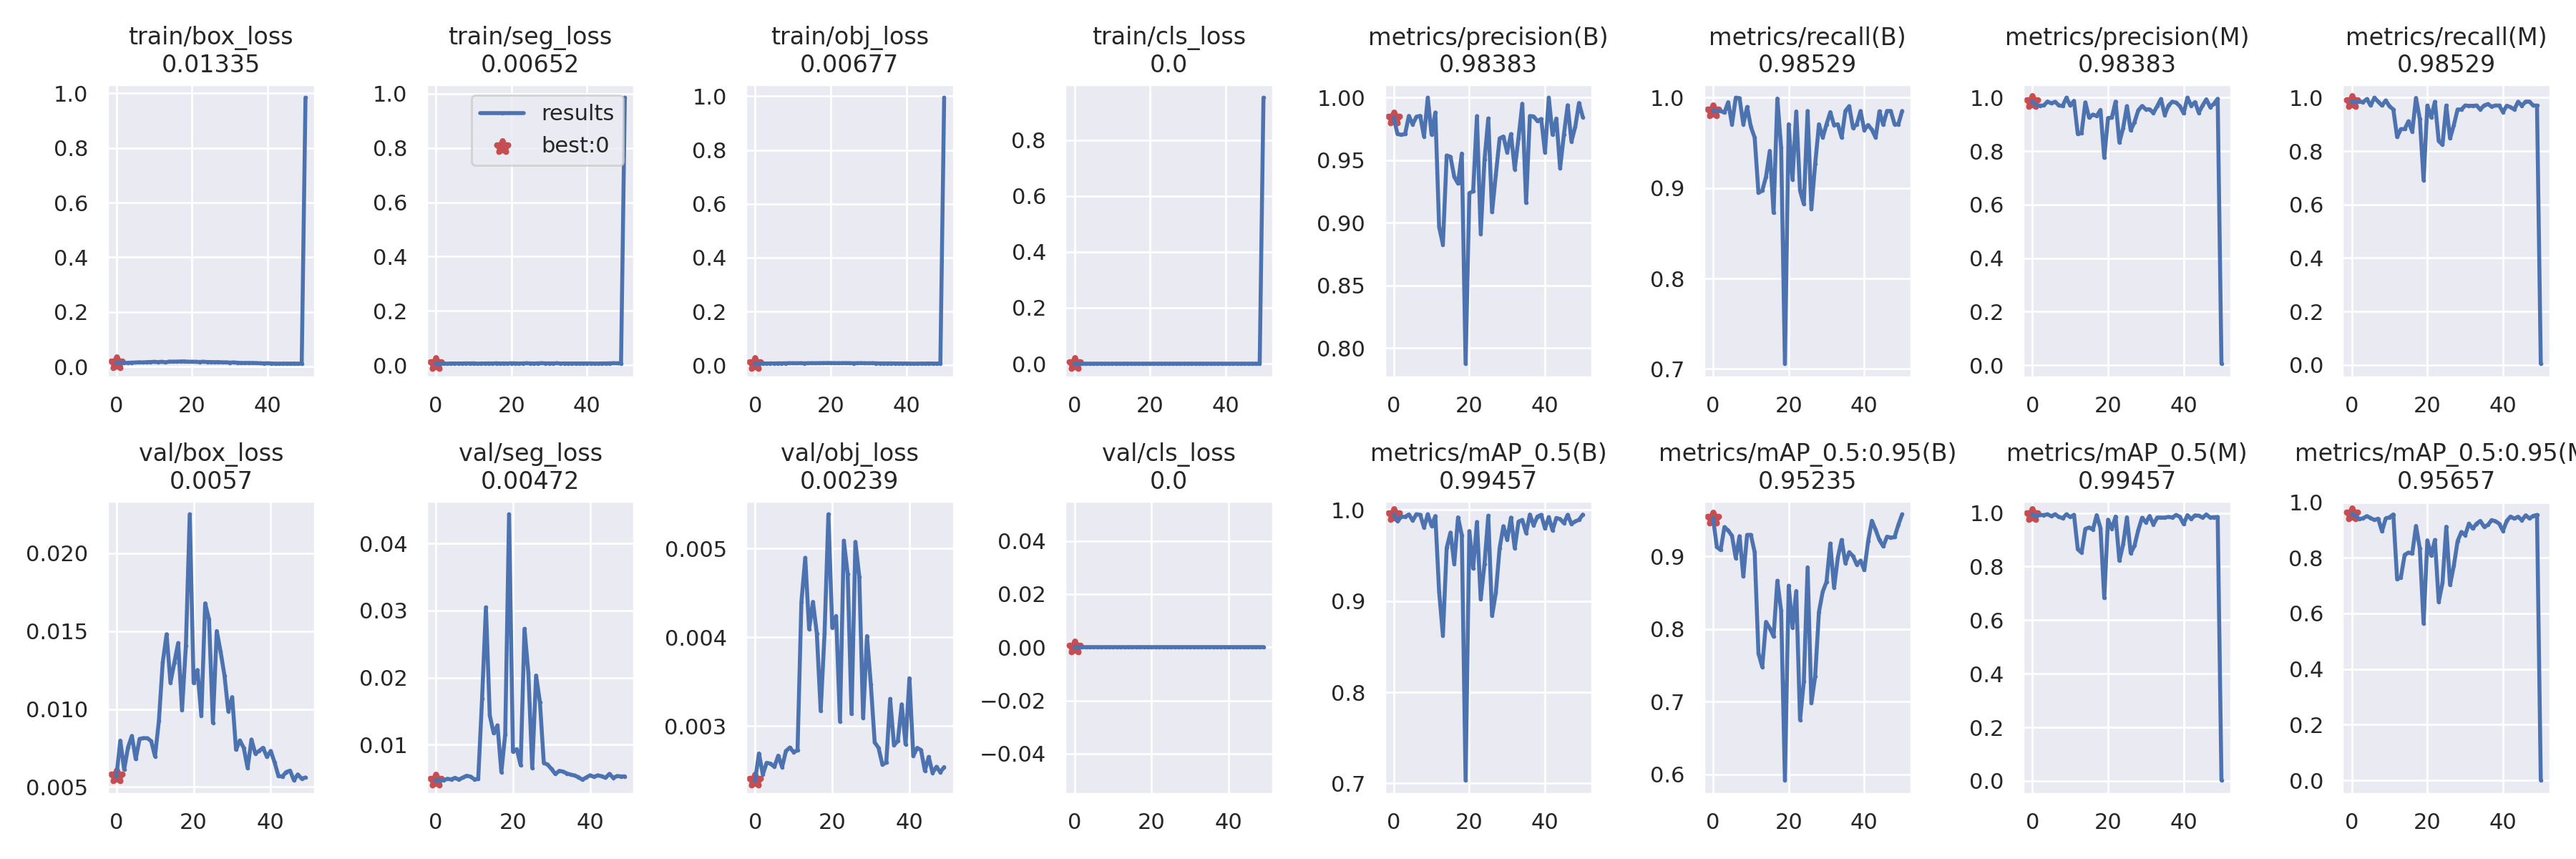

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 50 --data /content/drive/MyDrive/AnnotationDatasetYoloWBNew/data.yaml --weights /content/bestc4.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)